In [24]:
import hashlib
!pip install humanize
import humanize
import matplotlib.pyplot as plt
import numpy as np

from tqdm import trange

In [8]:
def hash(string):
    m = hashlib.sha256()
    m.update(string.encode('utf-8'))
    return m.digest()

In [19]:
hypo_path = "/home/z1079621/storage/embeddings/snli/hypothesis_snli_1.0_train_token.txt"
prem_path = "/home/z1079621/storage/embeddings/snli/premise_snli_1.0_train_token.txt"

hashes = set()
words = 0

for path in [prem_path, hypo_path]:
    lines = 0
    for i in open(path):
        lines += 1
    with open(path) as f:
        for _ in trange(lines):
            line = f.readline()
            words += len(line.split())
            hashes.add(hash(line))

100%|██████████| 549367/549367 [00:02<00:00, 196820.45it/s]


In [20]:
print(len(hashes))
print(words)

618821
12240821


In [21]:
humanize.naturalsize(words * 2 * 1024 * 4)

'100.3 GB'

In [30]:
sen_lens = []
total_lens = 0
total_padded_lens = 0
total_max_batch_padded_lens = 0

batch_size = 32

for path in [prem_path, hypo_path]:
    lines = 0
    for i in open(path):
        lines += 1
    with open(path) as f:
        batch = []
        for _ in trange(lines):
            line = f.readline()
            sen_len = len(line.split())
            sen_lens.append(sen_len)
            batch.append(sen_len)
            total_lens += sen_len
            total_padded_lens += 90
            if len(batch) >= batch_size:
                total_max_batch_padded_lens += np.max(batch) * batch_size
                batch = []

100%|██████████| 549367/549367 [00:02<00:00, 259089.50it/s]


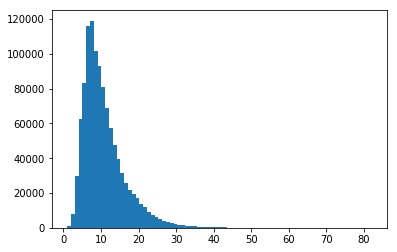

In [26]:
plt.hist(sen_lens, bins=80)
plt.show()

In [34]:
print("Total sentence lengths:", total_lens)
print("Total sentence lengths after fixed padding:", total_padded_lens)
print("Total sentence lengths after max-in-batch padding:", total_max_batch_padded_lens)

Total sentence lengths: 12240821
Total sentence lengths after fixed padding: 98886060
Total sentence lengths after max-in-batch padding: 21772512
